In [1]:
import numpy as np
import scipy.linalg
import pandas as pd
import matplotlib.pyplot as plt
import timeit

Question 2


In [2]:
def central_diff(fn, x, dx):
    return (fn(x + dx) - fn(x -dx)) / (2*dx)

def arctan_prime(x):
    return 1 / (x*x + 1)

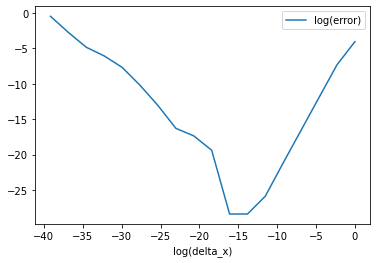

In [3]:

def q2():
    dx_list = [1/(10**i) for i in range(0,18)]
    true_val = arctan_prime(np.pi / 4)
    errors = [None for _ in dx_list]
    for i in range(len(dx_list)):
        errors[i] = abs(true_val - central_diff(np.arctan, np.pi / 4, dx_list[i]))
    df = pd.DataFrame()
    df["error"] = errors
    df["delta_x"] = dx_list
    df["log(error)"] = np.log(df['error'])
    df["log(delta_x)"] = np.log(df['delta_x'])
    df.plot(x="log(delta_x)", y="log(error)")
q2()


Question 6

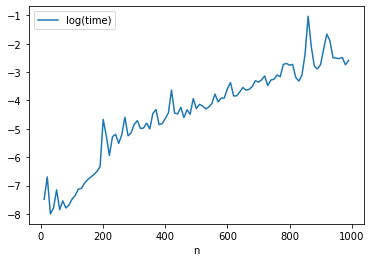

In [4]:
# Question 6

def q6():
    n_list = [i for i in range(10,1000,10)]
    times = [None] * len(n_list)
    for i in range(len(n_list)):
        n = n_list[i]
        mat = np.random.random_sample(size=(n, n // 2))
        setup='import scipy.linalg'
        stmt = 'scipy.linalg.lu(mat)'
        times[i] = timeit.timeit(setup=setup, stmt=stmt, globals=locals(), number=10)

    df = pd.DataFrame()
    df["n"] = n_list
    df["time"] = times
    df['log(time)'] = np.log(df['time'])
    df.plot(x="n", y="log(time)")
        
q6()
        

Question 7

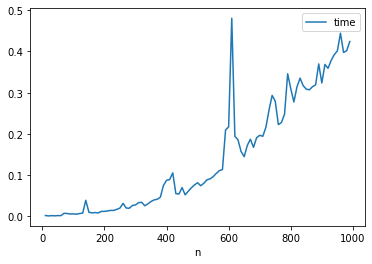

In [5]:
def q7():
    n_list = [i for i in range(10,1000,10)]
    times = [None] * len(n_list)
    for i in range(len(n_list)):
        n = n_list[i]
        mat = np.random.random_sample(size=(n, n // 2))
        setup='import scipy.linalg'
        stmt = 'scipy.linalg.qr(mat)'
        times[i] = timeit.timeit(setup=setup, stmt=stmt, globals=locals(), number=10)

    df = pd.DataFrame()
    df["n"] = n_list
    df["time"] = times
    df['log(time)'] = np.log(df['time'])
    df.plot(x="n", y="time")

q7()

In [9]:
def arnoldi_iteration(A: np.array, K: int) -> np.ndarray:
    # Initial components
    H = np.zeros(shape=(K+1, K))
    x = np.random.random_sample(size=(A.shape[0],1))
    q = x / np.linalg.norm(x)

    for k in range(K):
        u = A @ q # Generate next vector
        for j in range(k):
            H[j][k] = q.conj().T @ u
            u = u - (H[j][k] * q)
        H[k + 1][k] = np.linalg.norm(u)
        if H[k + 1][k] == 0.0:
            return H
        q = u / H[k + 1][k]

    return H

def q8():
    mat = np.random.random_sample(size=(30, 30))
    true_eigs = np.linalg.eig(mat)[0][:10]
    eigs_l = []
    error_l = []
    iters = [i for i in range(10,100,10)]

    for K in iters:
        H = arnoldi_iteration(mat, K)[:-1,:]
        eigs = np.linalg.eig(H)[0][:10]
        eigs_l.append(eigs)
        error_l.append(np.abs(np.abs(true_eigs) - np.abs(eigs)))
    
    return iters, eigs_l, error_l


iters, eigs_l, error_l = q8()

9


/opt/homebrew/Caskroom/miniconda/base/envs/test/lib/python3.9/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


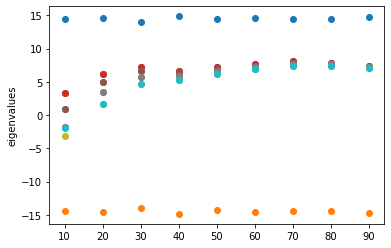

In [7]:
print(len(eigs_l))
eig_vs_iter = pd.DataFrame(data=eigs_l, columns=np.arange(len(eigs_l) + 1))
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_ylabel("eigenvalues")

x = iters
ax1.scatter(x=x, y=eig_vs_iter.iloc[:, 0])
ax1.scatter(x=x, y=eig_vs_iter.iloc[:, 1])
ax1.scatter(x=x, y=eig_vs_iter.iloc[:, 2])
ax1.scatter(x=x, y=eig_vs_iter.iloc[:, 3])
ax1.scatter(x=x, y=eig_vs_iter.iloc[:, 4])
ax1.scatter(x=x, y=eig_vs_iter.iloc[:, 5])
ax1.scatter(x=x, y=eig_vs_iter.iloc[:, 6])
ax1.scatter(x=x, y=eig_vs_iter.iloc[:, 7])
ax1.scatter(x=x, y=eig_vs_iter.iloc[:, 8])
ax1.scatter(x=x, y=eig_vs_iter.iloc[:, 9])
plt.show()

(9, 10)


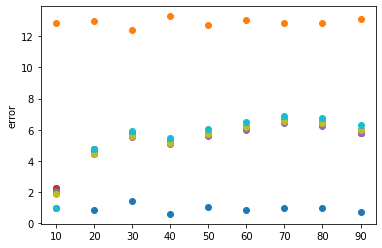

In [8]:
error_vs_iter = pd.DataFrame(data=error_l, columns=np.arange(len(error_l) + 1))

print(eig_vs_iter.shape)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_ylabel("error")

x = iters
ax1.scatter(x=x, y=error_vs_iter.iloc[:, 0])
ax1.scatter(x=x, y=error_vs_iter.iloc[:, 1])
ax1.scatter(x=x, y=error_vs_iter.iloc[:, 2])
ax1.scatter(x=x, y=error_vs_iter.iloc[:, 3])
ax1.scatter(x=x, y=error_vs_iter.iloc[:, 4])
ax1.scatter(x=x, y=error_vs_iter.iloc[:, 5])
ax1.scatter(x=x, y=error_vs_iter.iloc[:, 6])
ax1.scatter(x=x, y=error_vs_iter.iloc[:, 7])
ax1.scatter(x=x, y=error_vs_iter.iloc[:, 8])
ax1.scatter(x=x, y=error_vs_iter.iloc[:, 9])
plt.show()